In [ ]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import scatter_matrix

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import RandomizedSearchCV

from sklearn.pipeline import make_pipeline

from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import mean_squared_error
from sklearn.metrics import silhouette_score

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer

from sklearn.decomposition import PCA

from scipy.stats import loguniform, uniform

# Problem 1. Geron Chapter 8, Exercise 9.
Load the MNIST dataset (introduced
in Chapter 3) and
* split it into a training set and a test set (take the first 60,000 instances
for training, and the remaining 10,000 for testing).
* Train a random forest classifier on the
dataset and
    * time how long it takes,
    * then evaluate the resulting model on the test set.
* Next, use PCA to reduce the dataset’s dimensionality, with an explained variance ratio of 95%.
* Train a new random forest classifier on the reduced dataset and
    * see how long it takes. Was training much faster?
    * Next, evaluate the classifier on the test set.
    * How does it compare to the previous classifier? Try again with an SGDClassifier. How much does PCA help now?

In [ ]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)
X_train, X_test, y_train, y_test = mnist['data'][:60000], mnist['data'][60000:], mnist['target'][:60000], mnist['target'][60000:]

In [ ]:
forest_clf = RandomForestClassifier(n_estimators=100, random_state=8964,
                                    n_jobs=1, verbose=1)
%time forest_clf.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   25.6s


CPU times: user 52.2 s, sys: 99.1 ms, total: 52.3 s
Wall time: 52.4 s


RandomForestClassifier(n_jobs=1, random_state=8964, verbose=1)

In [ ]:
y_pred = forest_clf.predict(X_test)
print('The accuracy is ', accuracy_score(y_test, y_pred))

The accuracy is  0.9691


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s


In [ ]:
from google.colab import runtime
runtime.unassign()

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
X_train_reduced = pca.fit_transform(X_train)

In [ ]:
forest_clf_pca = RandomForestClassifier(n_estimators=100, random_state=8964,
                                    n_jobs=1, verbose=1)
%time forest_clf_pca.fit(X_train_reduced, y_train)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.6min


CPU times: user 2min 53s, sys: 263 ms, total: 2min 54s
Wall time: 3min 3s


RandomForestClassifier(n_jobs=1, random_state=8964, verbose=1)

In [1]:
X_test_reduced = pca.transform(X_test)
y_pred_pca = forest_clf_pca.predict(X_test_reduced)
print('The accuracy is ', accuracy_score(y_test, y_pred_pca))

NameError: name 'pca' is not defined

In [ ]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=8964)
sgd_clf_pca = SGDClassifier(random_state=8964)

In [ ]:
%time sgd_clf.fit(X_train, y_train)

CPU times: user 3min 34s, sys: 444 ms, total: 3min 35s
Wall time: 3min 56s


SGDClassifier(random_state=8964)

In [ ]:
%time sgd_clf_pca.fit(X_train_reduced, y_train)

CPU times: user 50.7 s, sys: 73 ms, total: 50.8 s
Wall time: 51 s


SGDClassifier(random_state=8964)

In [ ]:
print('The accuracy without PCA is {}\nTHe accuracy with PCA is {}'.format(
    accuracy_score(y_test, sgd_clf.predict(X_test)),
    accuracy_score(y_test, sgd_clf_pca.predict(X_test_reduced))
))

The accuracy without PCA is 0.892
THe accuracy with PCA is 0.8878


# Problem 2. Geron Chapter 9, Exercise 10.
The classic Olivetti faces dataset
contains 400 grayscale 64 x 64-pixel images of faces. Each image is flattened to a 1D vector
of size 4,096. Forty different people were photographed (10 times each), and the usual task
is to train a model that can predict which person is represented in each picture.
* Load the
dataset using the sklearn.datasets.fetch olivetti faces() function,
* then split it into a training
set, a validation set, and a test set
    * (note that the dataset is already scaled between 0 and
1).
    * Since the dataset is quite small, you will probably want to use stratified sampling to
ensure that there are the same number of images per person in each set.
* Next, cluster the
images using k-means, and
    * ensure that you have a good number of clusters (using one of the
techniques discussed in this chapter).
* Visualize the clusters: do you see similar faces in each
cluster?

In [ ]:
from sklearn.datasets import fetch_olivetti_faces

In [ ]:
faces = fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


In [ ]:
faces.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

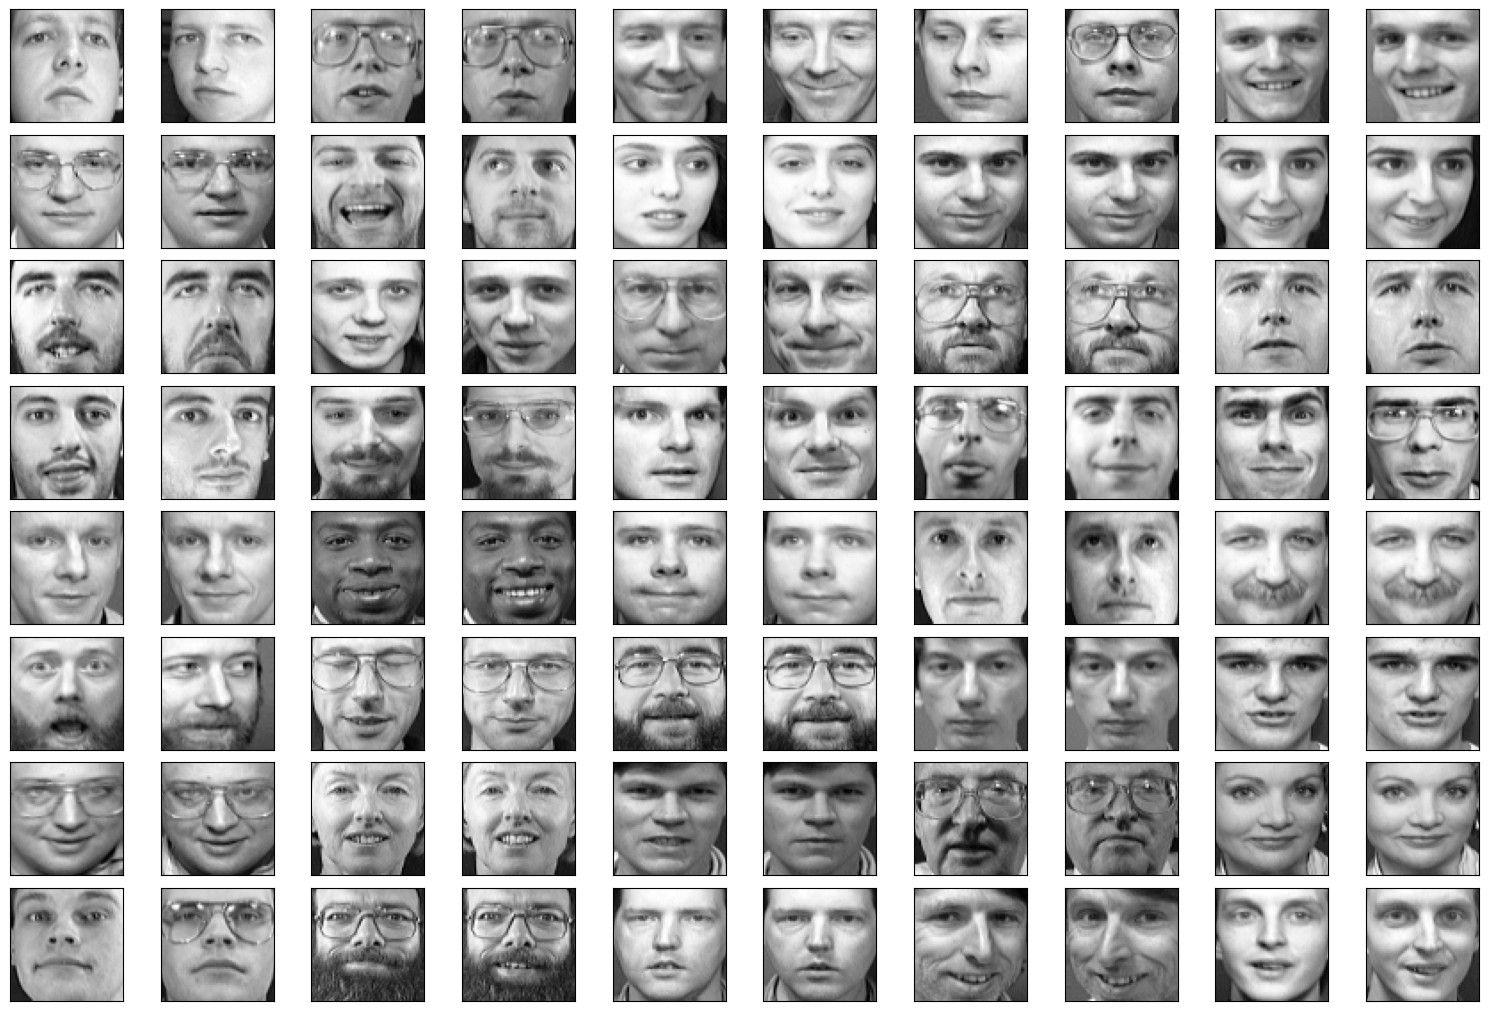

In [ ]:
fig, axes = plt.subplots(8, 10, figsize=(15, 10),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1),
                         layout='constrained')
for i, ax in enumerate(axes.flat):
    ax.imshow(faces.images[(i//2)*10 + np.random.randint(10)], cmap='gray')

In [ ]:
X_train_valid, X_test, y_train_valid, y_test = train_test_split(faces.data, faces.target,
                                                    test_size=40, random_state=8964,
                                                    stratify=faces.target)

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid,
                                                      test_size=80, random_state=8964,
                                                      stratify=y_train_valid)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
ks = np.arange(5, 150, 5)
kmeans_k = []

for k in ks:
    kmeans_k.append( KMeans(n_clusters=k, n_init=10, random_state=8964).fit(X_train) )
    print('|', end='')
print('\nFinish!')

|||||||||||||||||||||||||||||
Finish!


Text(0, 0.5, 'Inertia')

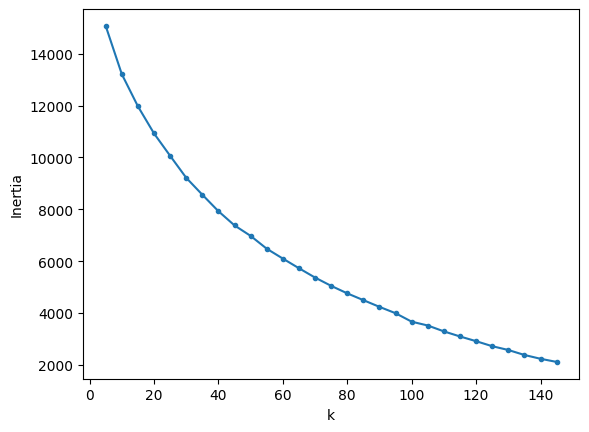

In [ ]:
plt.plot(ks, [km.inertia_ for km in kmeans_k], '.-')
plt.xlabel('k')
plt.ylabel('Inertia')

In [ ]:
from sklearn.metrics import silhouette_score

Text(0, 0.5, 'Silhouette Score')

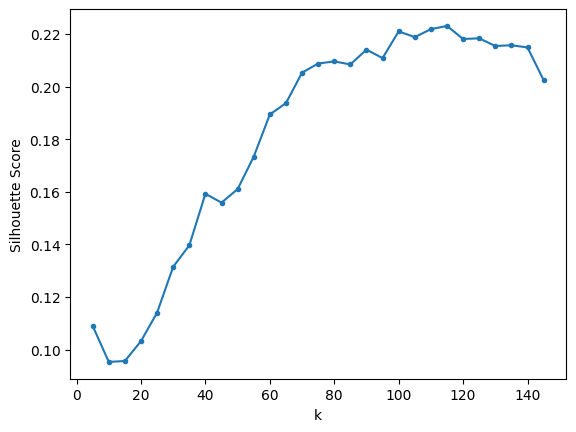

In [ ]:
plt.plot(ks, [silhouette_score(X_train, km.labels_) for km in kmeans_k], '.-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')

In [ ]:
pca = PCA(0.99)
X_train_pca = pca.fit_transform(X_train)
X_valid_pca = pca.transform(X_valid)
X_test_pca = pca.transform(X_test)

pca.n_components_

197

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
ks = np.arange(5, 150, 5)
kmeans_k = []

for k in ks:
    kmeans_k.append( KMeans(n_clusters=k, n_init=10, random_state=8964).fit(X_train_pca) )
    print('|', end='')
print('\nFinish!')

|||||||||||||||||||||||||||||
Finish!


Text(0, 0.5, 'Inertia')

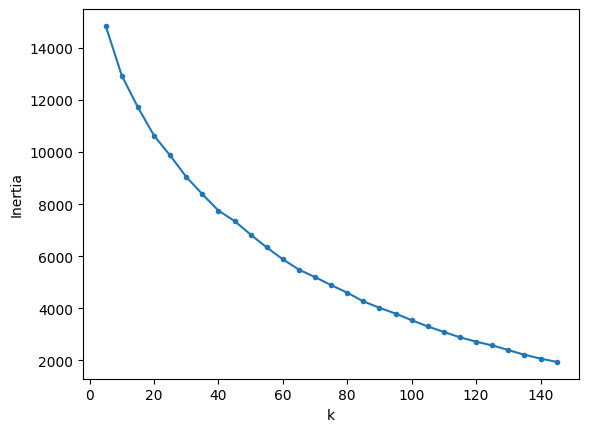

In [ ]:
plt.plot(ks, [km.inertia_ for km in kmeans_k], '.-')
plt.xlabel('k')
plt.ylabel('Inertia')

In [ ]:
from sklearn.metrics import silhouette_score

Text(0, 0.5, 'Silhouette Score')

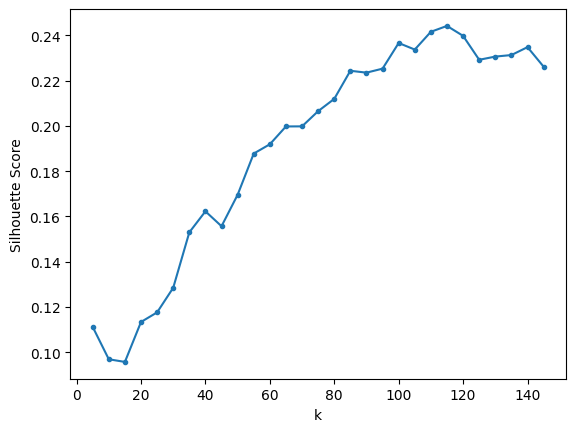

In [ ]:
silhouette_score =  [silhouette_score(X_train_pca, km.labels_) for km in kmeans_k]
plt.plot(ks, silhouette_score, '.-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')

In [ ]:
print('The best k is {}'.format(ks[np.argmax(silhouette_score)]))

The best k is 115


In [ ]:
kmeans_best = kmeans_k[np.argmax(silhouette_score)]

In [ ]:
def plot_faces(faces, labels, n_cols=5):
    faces = faces.reshape(-1, 64, 64)
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

for cluster_id in np.unique(kmeans_best.labels_):
    print("Cluster", cluster_id)
    in_cluster = kmeans_best.labels_==cluster_id
    imgs = X_train[in_cluster]
    labels = y_train[in_cluster]
    plot_faces(imgs, labels)

Output hidden; open in https://colab.research.google.com to view.

#Problem 3. Geron Chapter 9, Exercise 11.
Continuing with the Olivetti faces
dataset,
* train a classifier to predict which person is represented in each picture,
* and evaluate
it on the validation set.
* Next, use k-means as a dimensionality reduction tool, and train
a classifier on the reduced set.
 * Search for the number of clusters that allows the classifier
to get the best performance:
 * what performance can you reach?
* What if you append the
features from the reduced set to the original features (again,
 * searching for the best number
of clusters)?

In [ ]:
clf = RandomForestClassifier(n_estimators=150, random_state=8964, verbose=1)
clf.fit(X_train_pca, y_train)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.6s


RandomForestClassifier(n_estimators=150, random_state=8964, verbose=1)

In [ ]:
clf.score(X_valid_pca, y_valid)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


0.8625

In [ ]:
accuracy_score(y_valid, clf.predict(X_valid_pca))

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


0.8625

In [ ]:
X_train_reduced = kmeans_best.transform(X_train_pca)
X_valid_reduced = kmeans_best.transform(X_valid_pca)
X_test_reduced = kmeans_best.transform(X_test_pca)

clf = RandomForestClassifier(n_estimators=150, random_state=8964)
clf.fit(X_train_reduced, y_train)

clf.score(X_valid_reduced, y_valid)

0.725

In [ ]:
good_cluster_ids = []
good_cluster_labels = []

for cluster_id in np.unique(kmeans_best.labels_):
    labels = y_train[kmeans_best.labels_==cluster_id]
    if (len(labels)>1) and (len(np.unique(labels))==1):
        good_cluster_ids.append(cluster_id)
        good_cluster_labels.append(labels[0])


# for cluster_id in good_cluster_ids:
#     print("Cluster", cluster_id)
#     in_cluster = kmeans_best.labels_==cluster_id
#     imgs = X_train[in_cluster]
#     labels = y_train[in_cluster]
#     plot_faces(imgs, labels)

In [ ]:
np.array(good_cluster_ids)

array([  0,   2,   3,   5,   6,   7,   8,   9,  10,  12,  13,  17,  18,
        19,  20,  21,  22,  24,  25,  26,  28,  29,  31,  32,  33,  34,
        36,  37,  38,  39,  40,  41,  42,  43,  45,  46,  47,  48,  49,
        50,  51,  53,  54,  55,  56,  57,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  70,  71,  73,  76,  77,  82,  83,  84,  85,
        88,  90,  91,  92,  93, 102, 107, 110, 112], dtype=int32)

In [ ]:
mask = [ l in good_cluster_ids for l in kmeans_best.labels_ ]

In [ ]:
X_train_reduced_goodcluster = kmeans_best.transform(X_train_pca[mask])
X_valid_reduced = kmeans_best.transform(X_valid_pca)
X_test_reduced = kmeans_best.transform(X_test_pca)

clf = RandomForestClassifier(n_estimators=150, random_state=8964)
clf.fit(X_train_reduced_goodcluster, y_train[mask])

clf.score(X_valid_reduced, y_valid)

0.65

In [ ]:
X_train_extended = np.c_[X_train_pca, X_train_reduced]
X_valid_extended = np.c_[X_valid_pca, X_valid_reduced]
X_test_extended = np.c_[X_test_pca, X_test_reduced]

In [ ]:
X_train_pca.shape, X_train_reduced.shape, X_train_extended.shape

((280, 197), (280, 115), (280, 312))

In [ ]:
clf = RandomForestClassifier(n_estimators=150, random_state=8964)
clf.fit(X_train_extended, y_train)
clf.score(X_valid_extended, y_valid)

0.775

# Problem 4. Geron Chapter 9, Exercise 12.
* Train a Gaussian mixture model on the
Olivetti faces dataset. To speed up the algorithm, you should probably
    * reduce the dataset’s
dimensionality (e.g., use PCA, preserving 99% of the variance).
* Use the model to generate
some new faces (using the sample() method), and
    * visualize them (if you used PCA, you
will need to use its inverse transform() method).
* Try to modify some images (e.g.,
    * rotate,
flip, darken) and
    * see if the model can detect the anomalies (i.e., compare the output of the
score samples() method for normal images and for anomalies).


In [ ]:
from sklearn.mixture import GaussianMixture

In [ ]:
gm = GaussianMixture(n_components=40, n_init=10, random_state=8964, verbose=1)

In [ ]:
y_pred = gm.fit_predict(X_train_pca)

Initialization 0
Initialization converged.
Initialization 1
Initialization converged.
Initialization 2
Initialization converged.
Initialization 3
Initialization converged.
Initialization 4
Initialization converged.
Initialization 5
Initialization converged.
Initialization 6
Initialization converged.
Initialization 7
Initialization converged.
Initialization 8
Initialization converged.
Initialization 9
Initialization converged.


In [ ]:
X_new, y_new = gm.sample(20)
faces_new = pca.inverse_transform(X_new)

In [ ]:
faces_new.shape

(20, 4096)

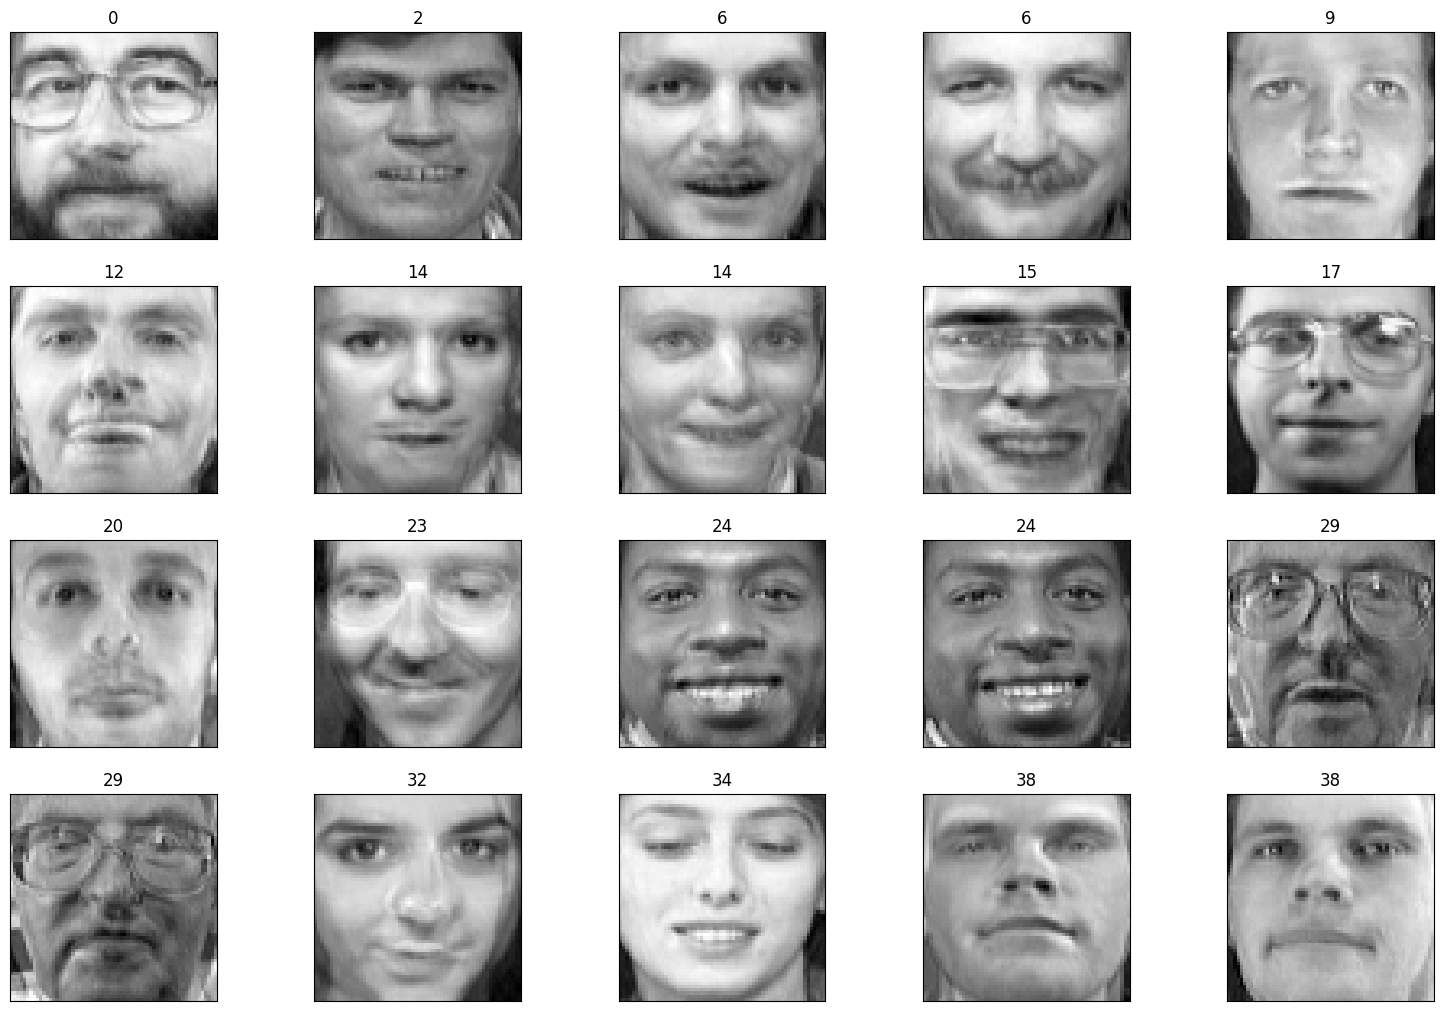

In [ ]:
fig, axes = plt.subplots(4, 5, figsize=(15, 10),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1),
                         layout='constrained')
for i, ax in enumerate(axes.flat):
    ax.imshow(faces_new[i].reshape(64, 64), cmap='gray')
    ax.set_title(y_new[i])

In [ ]:
n_rotated = 4
rotated = np.transpose(X_train[:n_rotated].reshape(-1, 64, 64), axes=[0, 2, 1])
rotated = rotated.reshape(-1, 64*64)
y_rotated = y_train[:n_rotated]

n_flipped = 3
flipped = X_train[:n_flipped].reshape(-1, 64, 64)[:, ::-1]
flipped = flipped.reshape(-1, 64*64)
y_flipped = y_train[:n_flipped]

n_darkened = 3
darkened = X_train[:n_darkened].copy()
darkened *= 0.3
y_darkened = y_train[:n_darkened]

X_bad_faces = np.r_[rotated, flipped, darkened]
y_bad = np.concatenate([y_rotated, y_flipped, y_darkened])

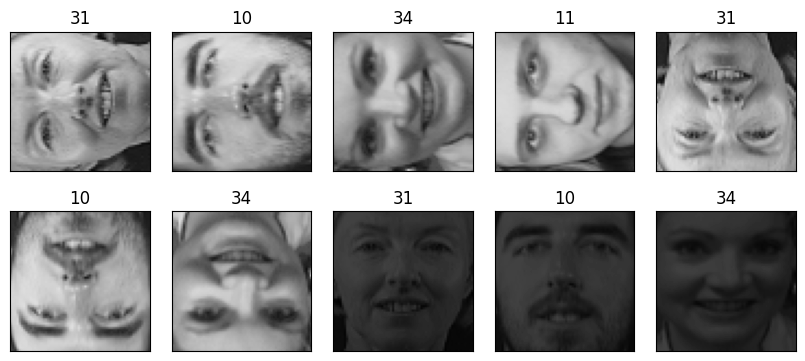

In [ ]:
fig, axes = plt.subplots(2, 5, figsize=(8,3.5),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1),
                         layout='constrained')
for i, ax in enumerate(axes.flat):
    ax.imshow(X_bad_faces[i].reshape(64, 64), cmap='gray', clim=[0,1])
    ax.set_title(y_bad[i])

In [ ]:
X_bad_faces_pca = pca.transform(X_bad_faces)

In [ ]:
gm.score_samples(X_bad_faces_pca)

array([-3.28890054e+07, -3.92954014e+07, -3.81509945e+07, -4.55841728e+07,
       -6.13868615e+07, -5.20929367e+07, -4.88725649e+07, -9.46556927e+07,
       -8.49691514e+07, -1.09286161e+08])

In [ ]:
gm.score_samples(X_train_pca[:4])

array([1158.26343789, 1128.08616204, 1099.40745167, 1113.01284858])

The modifed images have very low scores.